# Linear Model Selection and Regularization

## Best Subset Selection

In [1]:
#Import library and dataset
library(ISLR)
fix(Hitters)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [2]:
dim(Hitters)

[1] 322  20

In [4]:
sum(is.na(Hitters$Salary))

[1] 59

In [5]:
Hitters = na.omit(Hitters)

In [6]:
dim(Hitters)

[1] 263  20

In [9]:
library(leaps)
regfit.full = regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

Regsubsets return which predictors are significant in k-predictor model. E.g. for predictor AtBat, it is significant in 5,6 and 8-predictor models.

## Select best models from 1 predictor up to 19 predictors in one model

In [10]:
regfit.full = regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)

In [11]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [12]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

## Plot test error estimates against all models of k predictors

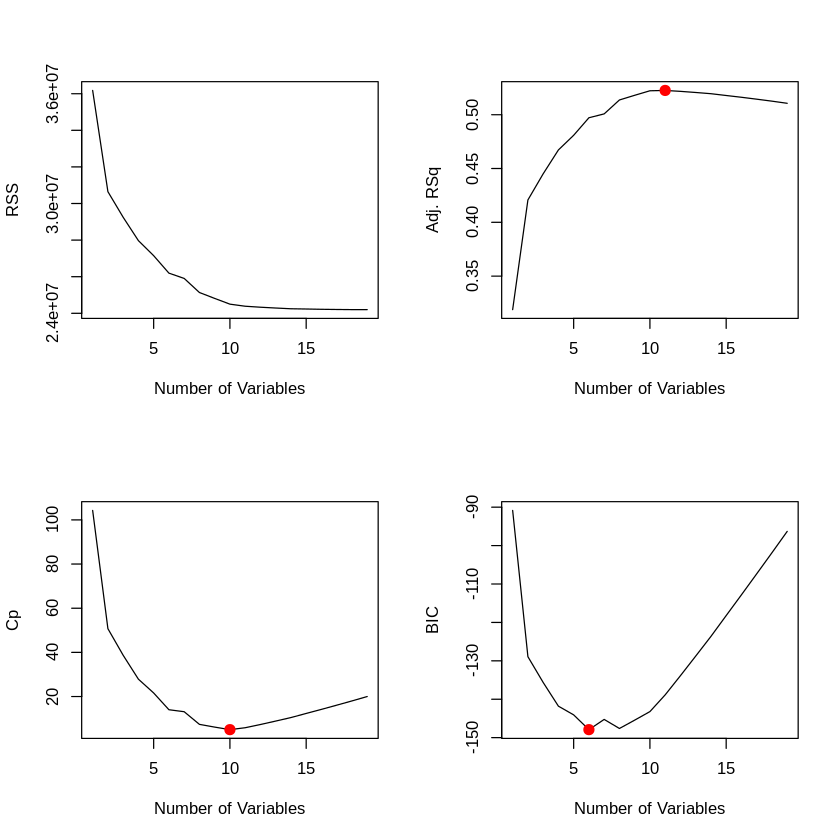

In [23]:
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab='Number of Variables',ylab='RSS',type='l')

#Plot Adj. R2 against best model of k predictors
plot(reg.summary$adjr2,xlab='Number of Variables',ylab='Adj. RSq',type='l')
min_loc_adjr2<-which.max(reg.summary$adjr2)
points(min_loc_adjr2,reg.summary$adjr2[min_loc_adjr2],col='red',cex=2,pch=20)

#Plot Cp against best model of k predictors
plot(reg.summary$cp,xlab='Number of Variables',ylab='Cp',type='l')
min_loc_cp<-which.min(reg.summary$cp)
points(min_loc_cp,reg.summary$cp[min_loc_cp],col='red',cex=2,pch=20)

#Plot BIC against best model of k predictors
plot(reg.summary$bic,xlab='Number of Variables',ylab='BIC',type='l')
min_loc_bic<-which.min(reg.summary$bic)
points(min_loc_bic,reg.summary$bic[min_loc_bic],col='red',cex=2,pch=20)

## Plot composition of predictors in all models

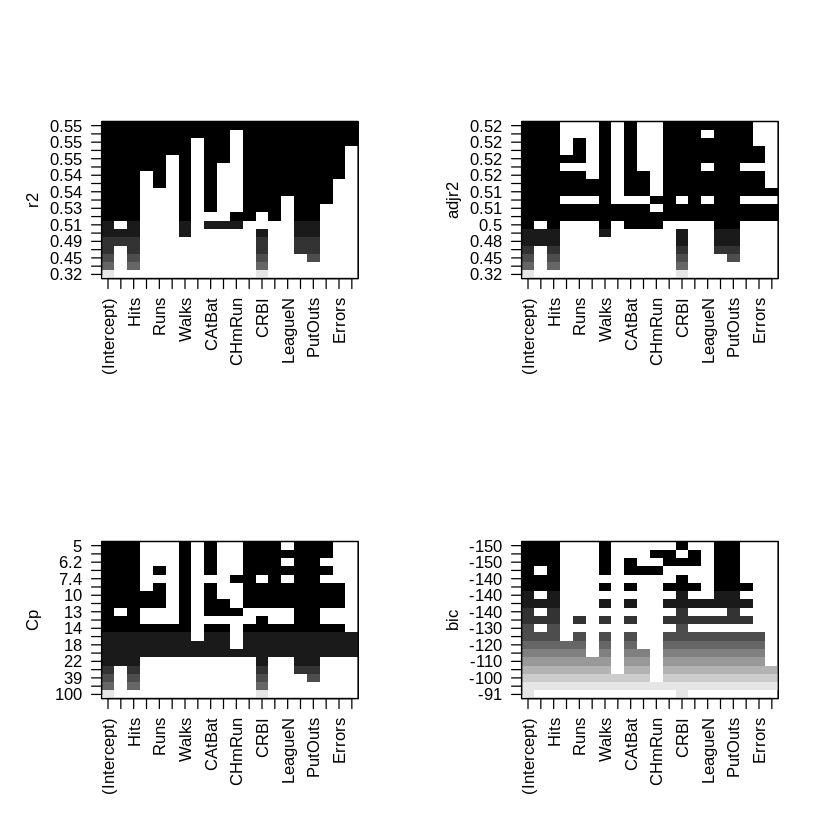

In [25]:
par(mfrow=c(2,2))
plot(regfit.full,scale='r2')
plot(regfit.full,scale='adjr2')
plot(regfit.full,scale='Cp')
plot(regfit.full,scale='bic')

## Inquire coefficients of the best model with specific no of predictors

In [19]:
coef(regfit.full,6)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


## Forward and Backward Stepwises Selection

In [26]:
regfit.fwd = regsubsets(Salary~.,data=Hitters,nvmax=19,method='forward')
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [27]:
regfit.bwd = regsubsets(Salary~.,data=Hitters,nvmax=19,method='backward')
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [32]:
coef(regfit.full,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [33]:
coef(regfit.fwd,7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [34]:
coef(regfit.bwd,7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Model Selection by Validation Set and Cross-Validation Approaches

### Validation set approach

In [48]:
set.seed(1)
train=sample(c(TRUE,FALSE),nrow(Hitters),rep=TRUE)
test=(!train)

In [49]:
regfit.best = regsubsets(Salary~.,data=Hitters[train,],nvmax=19)

In [50]:
#Instantiate test set
test.mat = model.matrix(Salary~.,data=Hitters[test,])

In [51]:
#Instantiate empty array of validation errors
val.errors=rep(NA,19)
for (i in 1:19){
    coefi = coef(regfit.best,id=i)
    pred = test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

In [52]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [53]:
which.min(val.errors)

[1] 7

In [54]:
coef(regfit.best,which.min(val.errors))

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

In [43]:
predict.regsubsets = function(object,newdata,id,...){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form,newdata)
    coefi = coef(object,id=id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

Prediction function for regsubset method, aka regression subset selection

In [55]:
regfit.best = regsubsets(Salary~.,data=Hitters,nvmax=19)
coef(regfit.best,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

### Cross-validation (k-fold/10-fold CV)

In [46]:
k=10
set.seed(1)
folds = sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors = matrix(NA,k,19,dimnames=list(NULL,paste(1:19)))

In [56]:
for (j in 1:k){
    best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
    for (i in 1:19){
        pred = predict(best.fit,Hitters[folds==j,],id=i)
        cv.errors[j,i] = mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

The function returns a 10x19 matrix, containing test MSE of all combinations of 19-predictor models and 10-fold CV.

In [58]:
mean.cv.errors = apply(cv.errors,2,mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

Calculate mean of CV error of all models of varying predictors, up to 19. 
Apply(cv.errors,2,mean) means applying mean method to axis 2 of 2d array cv.errors

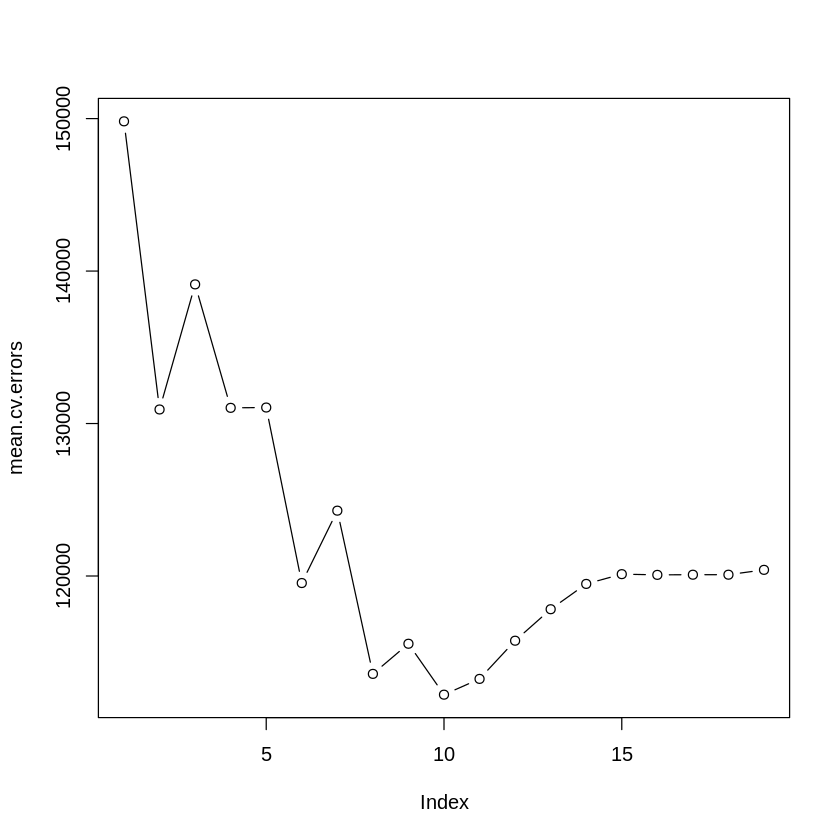

In [59]:
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')

In [60]:
reg.best = regsubsets(Salary~.,data=Hitters,nvmax=19)
coef(reg.best,11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277